In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    implementChannelWidthLimit,
    fromHB5Table1,
)
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit, validateChannelWidthLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution

BR_Z_ll = 2 * 3.3658e-2  # from 2020 PDG


# CMS 13TeV LHC

## width dep `p p > H > Z gam` [1712.03143](https://arxiv.org/abs/1712.03143)

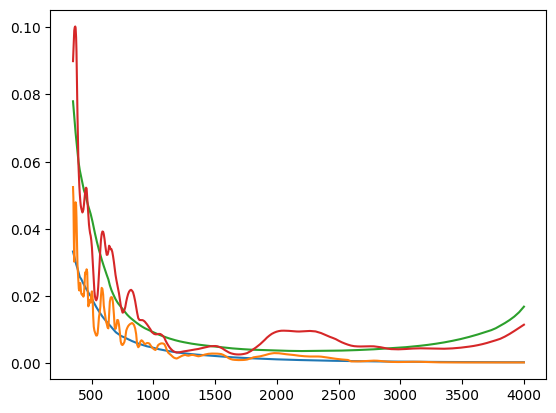

Looks good. Saving this to H_LHC13_CMS_36.json


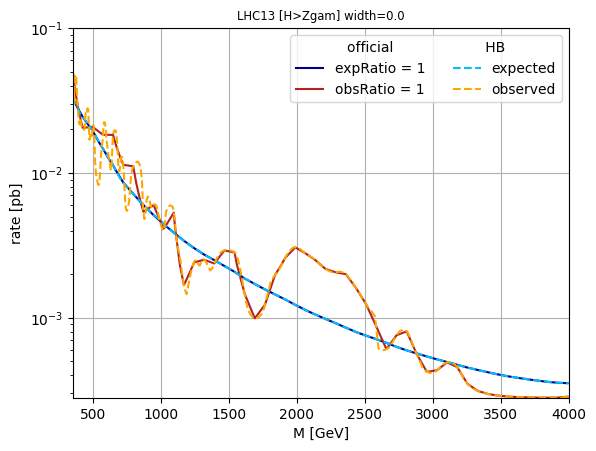

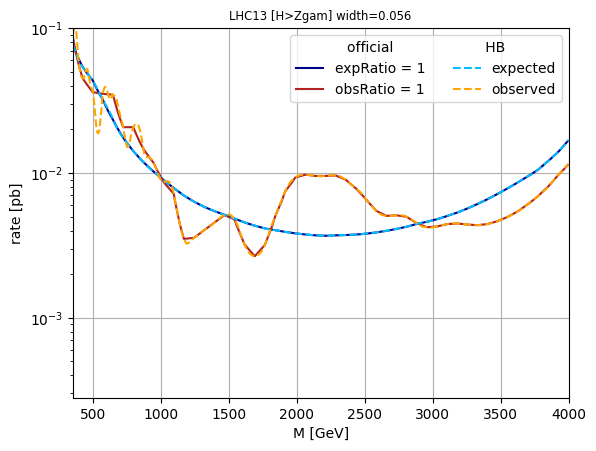

In [2]:
df = pd.read_csv("data/1712_03143_Fig7ab.csv")
limitFile = implementChannelWidthLimit(
    "1712.03143",
    {"channels": [["H", "Zgam"]]},
    "Fig. 7ab",
    df,
    massResolution=resolution.Zgam["default"],
)

lim = HB.Limit(limitFile)
validateChannelWidthLimit(lim)

# CMS 8TeV LHC

## `p p > H > Z gam` [1610.02960](http://arxiv.org/abs/1610.02960)

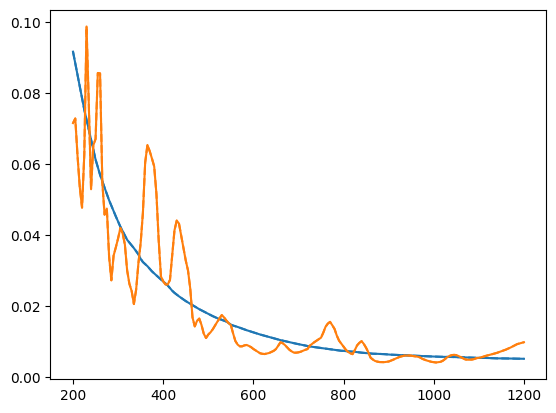

Looks good. Saving this to H_LHC8_CMS_20.json


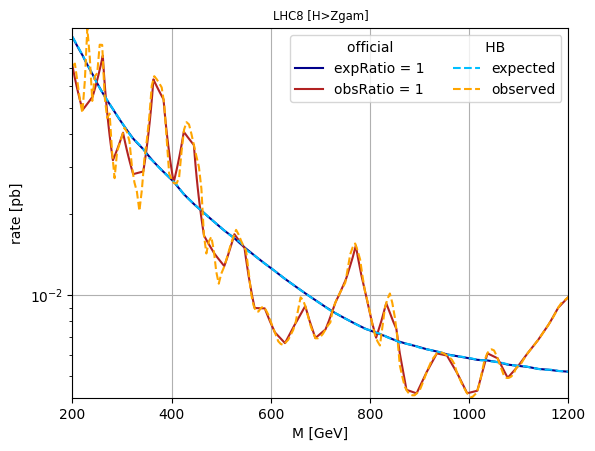

In [3]:
df = pd.read_csv("data/1610_02960_Fig3a.csv")
limitFile = implementChannelLimit(
    "1610.02960",
    {"channels": [["H", "Zgam"]]},
    "Fig. 3a",
    df,
    collider="LHC8",
    luminosity=19.7,
    massResolution=resolution.Zgam["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `H > Z gam` SM-Higgs combination [1307.5515](https://arxiv.org/abs/1307.5515)

Multiple different luminosity values: [19.6, 5.0] using 19.6 unless you set it manually


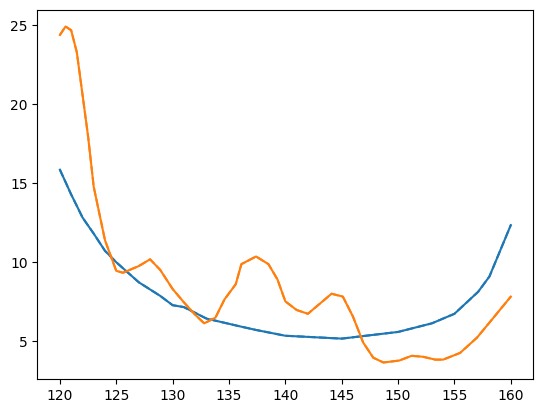

Looks good. Saving this to comb_LHC8_CMS_25.json
using effective coupling input for SM-normalized limit


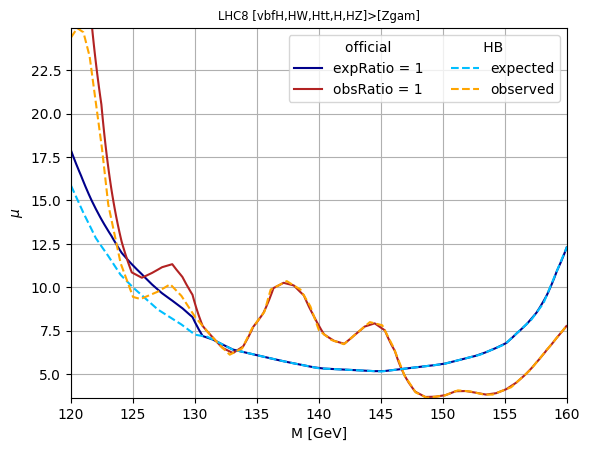

In [4]:
df = fromHB5Table1("13075515_CMS_H-Zgamma_24.6fb-1", "CMS")
process = {"channels": [[p, "Zgam"] for p in ["H", "vbfH", "HZ", "HW", "Htt"]]}
limitFile = implementChannelLimit(
    "1307.5515",
    process,
    "Fig. 5 (top-left)",
    df,
    massResolution=resolution.Zgam["default"],
    luminosity=5.0 + 19.6,
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
